In [2]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import pandas as pd

[996.6870698984161, 256.3436562144731, 122.4113714317045, 109.22034665119281, 107.09730076168913, 105.3059252353448, 103.3202835665999, 101.82036820534282, 101.00206400626628, 98.19474236052135, 96.59751729328916, 94.54921948630827, 93.58319100303014, 91.44574620135226, 88.05548560598872, 86.70052388851892, 82.8372174743169, 79.13073358111755, 75.64226435514026, 73.08343863050371, 70.44279161307391, 67.59437630544119, 65.32070930635204, 63.77644891855647, 63.23096757466394, 62.20725446972251, 62.07757495815797, 60.626667006621204, 60.161821510958085, 61.137583471516166, 59.68441779866101, 59.435659017753444, 59.11711887569899, 58.60550258562027, 59.12009916430634, 58.4791836278157, 58.92189536372715, 58.955871989663684, 58.299415809475796, 57.78704252773108, 57.86200855631522, 58.16650880368952, 57.70556380808919, 57.12827986252387, 57.109198779583544, 56.909632729621094, 56.29445564681968, 55.9010199829878, 54.95812647230618, 54.80427428442135, 53.43614076719614, 51.49197252197104, 49

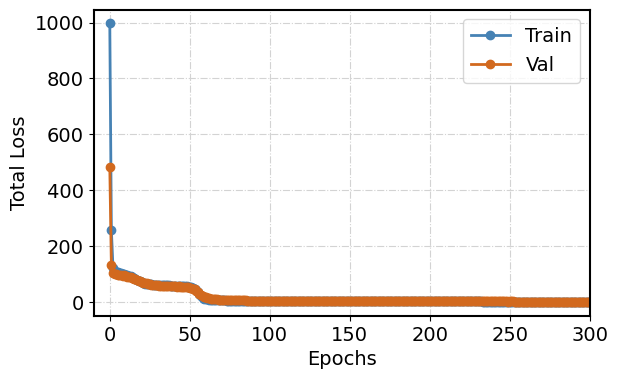

In [12]:
# data = jnp.load('../DiracNPC/residual.npy')
# train = pd.read_csv('../DiracNPC/log/trainloss.csv').iloc[:,-1]
# val = pd.read_csv('../DiracNPC/log/valLoss.csv').iloc[:,-1]
import pickle
with open('../DiracNPC/log/log_U1_0-n1000_rz.pkl', 'rb') as f:
    log = pickle.load(f)
train = log['train_loss']
val = log['val_loss']
print(train)

fig, ax = plt.subplots()
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.size'] = 14
ax.set_box_aspect(1/1.62)
ax.grid(True, color='lightgray', linestyle='-.')
ax.plot(train, color='steelblue', marker='o', label='Train')
ax.plot(val, color='chocolate', marker='o', label='Val')
ax.set_xlabel('Epochs')
ax.set_ylabel('Total Loss')
xmin, xmax = ax.get_xlim()
ax.set_xlim(-10,300)
#ax.set_ylim(400, 800)
ax.legend()
fig.savefig('../figures/log_u1_0_n1000.pdf', format='pdf', bbox_inches='tight')

Text(0.5, 1.0, 'Residual at step 20')

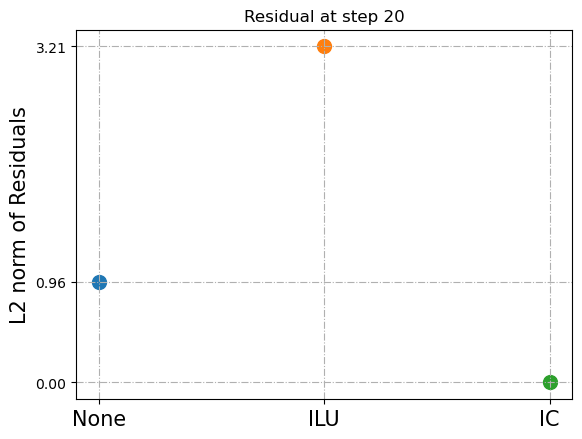

In [10]:
fig, ax = plt.subplots()
ax.scatter(0, 0.96, s=100)
ax.scatter(1, 3.21, s=100)
ax.scatter(2, 3.7e-14, s=100)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['None', 'ILU', 'IC'], fontsize=15)
ax.set_yticks([0.96, 3.21, 3.7e-14])
ax.set_ylabel('L2 norm of Residuals', fontsize=15)
ax.grid(True, linestyle='-.')
ax.set_title('Residual at step 20')

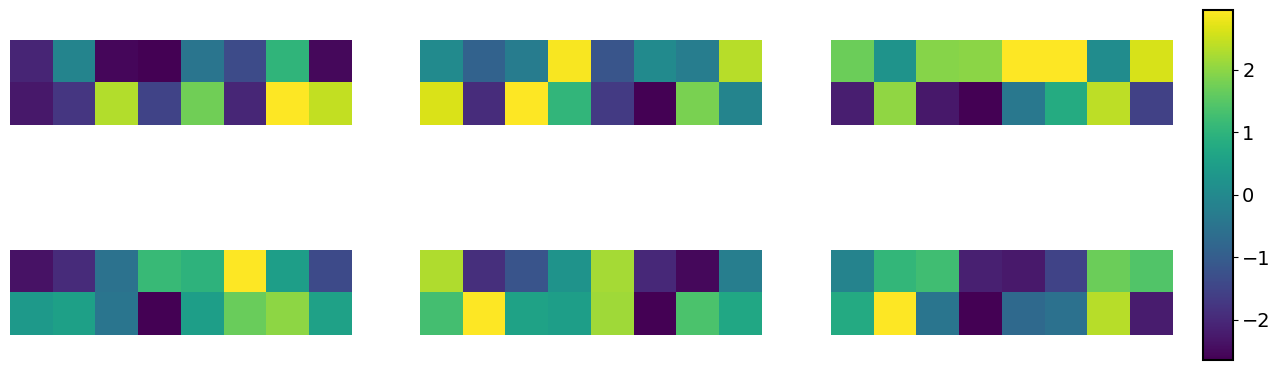

In [18]:
# visualize some U1 fields
import numpy as np

U1 = np.load(
    "../../datasets/Dirac/precond_data/config.l8-N1600-b2.0-k0.276-unquenched.x.npy"
)
U1 = np.asarray(U1)

fig, ax = plt.subplots(2,3, figsize=(15, 5))
for i in range(3):
    for j in range(2):
        im=ax[j, i].imshow(U1[i, :, :, j], cmap='viridis')
        ax[j, i].axis('off')
    # add a common colorbar to all subplots, make sure they share the same color range
fig.subplots_adjust(right=0.9)

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)
fig.savefig('../figures/U1_fields.pdf', format='pdf', bbox_inches='tight')